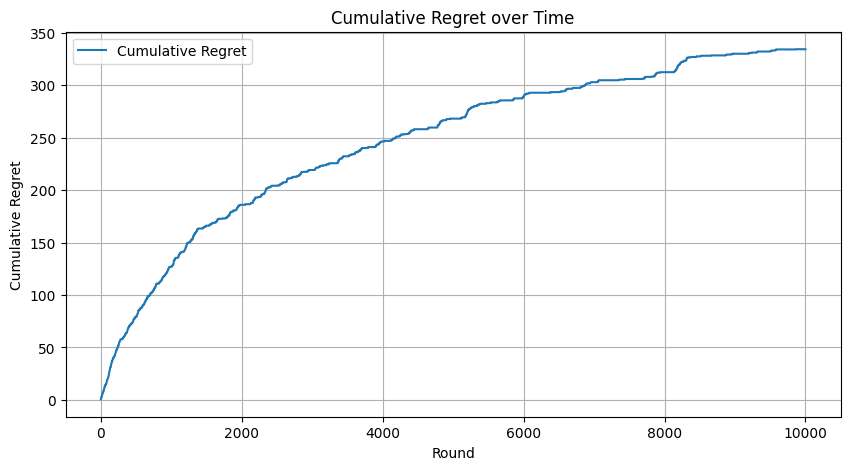

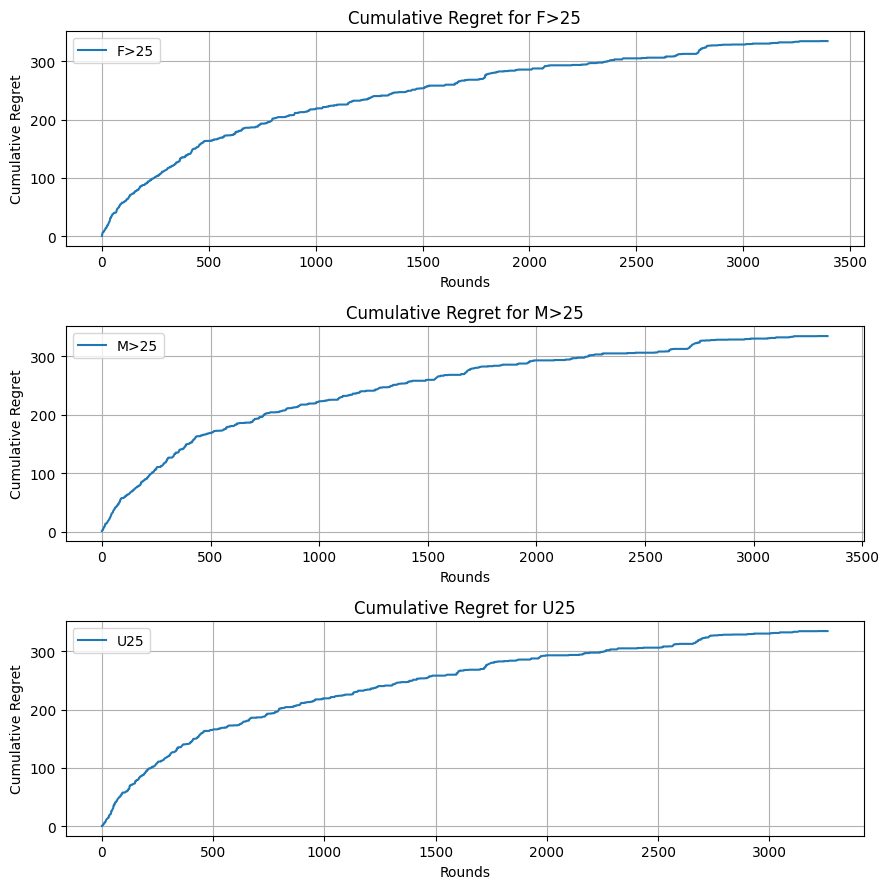

For category: F>25
Total rewards: [2439.   79.   51.   28.    4.]
Total times_shown: [3042.  147.  106.   71.   30.]
Average rewards: [0.80177515 0.53741497 0.48113208 0.3943662  0.13333333]

For category: M>25
Total rewards: [   6.   33.   52.   61. 2413.]
Total times_shown: [  34.   79.  107.  120. 3001.]
Average rewards: [0.17647059 0.41772152 0.48598131 0.50833333 0.80406531]

For category: U25
Total rewards: [  15.   35. 2339.   88.   38.]
Total times_shown: [  49.   81. 2891.  157.   85.]
Average rewards: [0.30612245 0.43209877 0.80906261 0.56050955 0.44705882]



In [89]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Number of articles
n_articles = 5
# Rewards for each article.
reward_probabilities = {
    "F>25": [0.8, 0.6, 0.5, 0.4, 0.2],
    "M>25": [0.2, 0.4, 0.5, 0.6, 0.8],
    "U25": [0.2, 0.4, 0.8, 0.6, 0.5]
}

# Dictionary with another dictionary embeded to hold times_shown (the number that each article has been shown to each category) and clicks that have been rewarded
# to each article of each category. These are needed in order to calculate UCB1 and to plot the cummulative regret. Their length is the same as the number of articles of each categroy as it is appropriate
users = {
    "F>25": {"times_shown": np.zeros(n_articles), "click_rewards": np.zeros(n_articles)},
    "M>25": {"times_shown": np.zeros(n_articles), "click_rewards": np.zeros(n_articles)},
    "U25": {"times_shown": np.zeros(n_articles), "click_rewards": np.zeros(n_articles)}
}

# Track cumulative regret
cumulative_regret = 0
cumulative_regrets = [] # Array which will be used to plot the evolution of regret over time
cumulative_regret_F25 = 0
cumulative_regret_M25 = 0
cumulative_regret_U25 = 0
category_regrets_F25 = []
category_regrets_M25 = []
category_regrets_U25 = []

# Number of rounds to advertise
T = 10000

def ucb(mean, n, nj):
    if nj == 0:
        return float('inf')  # Handle division by zero if the article hasn't been pulled
    return mean + np.sqrt(2 * np.log(n) / nj) # Mathematical formula of UCB1

def select_articles(times_shown, click_rewards):
    total_click_rewards = np.sum(times_shown)
    if np.any(times_shown == 0):       # If an article has never been shown before, show it
        return np.argmin(times_shown)
    ucb_click_rewards = [ucb(click_rewards[i] / times_shown[i], total_click_rewards, times_shown[i]) for i in range(n_articles)]  #Calculate the UCB1 index for each article in the category and return the maximum in the line below
    return np.argmax(ucb_click_rewards)

def simulate(round_data, round_number):
    global cumulative_regret
    global cumulative_regret_F25
    global cumulative_regret_M25
    global cumulative_regret_U25

    category = round_data["category"]
    rew_probs = round_data["probabilities"]

    times_shown = users[category]["times_shown"]   #Store the total count of rounds already played, in this case the number of times the articles have already been shown in this category
    click_rewards = users[category]["click_rewards"]   #Store the total number of time each article in the category has been clicked.

    article = select_articles(times_shown, click_rewards)     # Select the best article (the article with the highest probability to be clicked)
    reward = np.random.binomial(1, rew_probs[article]) # Click of user is simulated with binomial distribution. Reward is (1 if rewarded otherwise 0) and article's probability
    
    times_shown[article] += 1        # Update the number of times the article has been shown
    click_rewards[article] += reward # Store the reward if the article was clicked!

    # Calculate and update cumulative regret
    regret = (0.8 - rew_probs[article])
    cumulative_regret += regret
    cumulative_regrets.append(cumulative_regret)

    #Calculate the regret for each category alone
    if category == "F>25":
        cumulative_regret_F25 += regret
        category_regrets_F25.append(cumulative_regret)
    elif category == "M>25":
        cumulative_regret_M25 += regret
        category_regrets_M25.append(cumulative_regret)
    else:
       cumulative_regret_U25 += regret
       category_regrets_U25.append(cumulative_regret)


rounds = [{} for _ in range(T)] # Initialize an array of dictionaries that has the range of the total rounds value
for i in range(T):
    category = random.choice(list(reward_probabilities.keys())) #Randomly choose a "person" from each of the three categories as the algorithm doesn't know that these categories exist at all
    rounds[i] = {"category": category, "probabilities": reward_probabilities[category]} # Store category and probabilities of each category in order to access them later
    simulate(rounds[i], i + 1) # Commence the algorithm

# Plotting the cumulative regret
plt.figure(figsize=(10, 5))
plt.plot(cumulative_regrets, label='Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9, 9))
# Create the first subplot for category "F>25"
plt.subplot(3, 1, 1)
plt.plot(category_regrets_F25, label='F>25')
plt.title('Cumulative Regret for F>25')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
# Create the second subplot for category "M>25"
plt.subplot(3, 1, 2)
plt.plot(category_regrets_M25, label='M>25')
plt.title('Cumulative Regret for M>25')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.grid(True)
# Create the third subplot for category "U25"
plt.subplot(3, 1, 3)
plt.plot(category_regrets_U25, label='U25')
plt.title('Cumulative Regret for U25')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Print results
for category, data in users.items():
    total_rewards = data["click_rewards"]
    total_times_shown = data["times_shown"]
    average_rewards = total_rewards / total_times_shown  # element-wise division
    print(f"For category: {category}")
    print("Total rewards:", total_rewards)
    print("Total times_shown:", total_times_shown)
    print("Average rewards:", average_rewards)
    print()   
